In [81]:
import os
os.getcwd()

'C:\\Users\\hp\\Desktop'

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [83]:
dataset = pd.read_csv("Credit_Risk_XTrain.csv")
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Preprocessing

In [84]:
dataset.isnull().sum()/len(dataset)*100
#We remove the variable having 25% or more missing values out of the total data.
#Each variable is less than 25% hence no variable needs to be removed

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [85]:
'''Null values present in these columns
Gender               2.117264
Married              0.488599
Dependents           2.442997
Self_Employed        5.211726
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322'''

'Null values present in these columns\nGender               2.117264\nMarried              0.488599\nDependents           2.442997\nSelf_Employed        5.211726\nLoanAmount           3.583062\nLoan_Amount_Term     2.280130\nCredit_History       8.143322'

In [86]:
dataset.info()
#finding out null values havinh character type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [87]:
'''    Gender             601 non-null    object 
     Married            611 non-null    object 
     Dependents         599 non-null    object
    Self_Employed      582 non-null    object'''

'    Gender             601 non-null    object \n     Married            611 non-null    object \n     Dependents         599 non-null    object\n    Self_Employed      582 non-null    object'

In [88]:
# we fill the missing / null values with mode in case of categorical data
dataset['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [89]:
dataset.groupby('Gender').size()

Gender
Female    112
Male      489
dtype: int64

In [90]:
#Filling null values with most frequent variable, in Gender male is the most frequent one
dataset['Gender'] = dataset['Gender'].fillna('Male')

In [91]:
dataset['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [92]:
dataset['Married'] = dataset['Married'].fillna('Yes')

In [93]:
dataset['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [94]:
dataset['Dependents'] = dataset['Dependents'].fillna('0')

In [95]:
dataset['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [96]:
dataset['Self_Employed'] = dataset['Self_Employed'].fillna('No')

In [97]:
dataset.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [98]:
'''When we have float value we need to fill it with mean or median value for that we need to find boxplot'''


'When we have float value we need to fill it with mean or median value for that we need to find boxplot'

<Axes: ylabel='LoanAmount'>

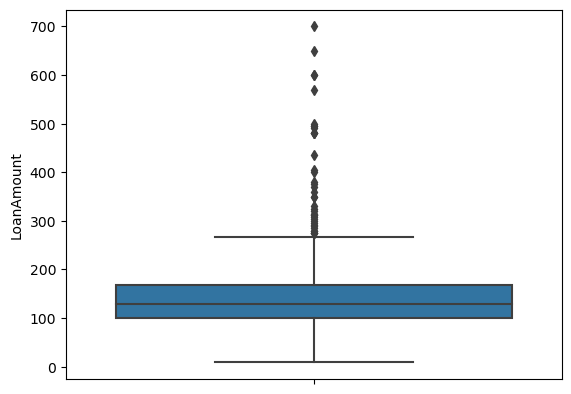

In [99]:
sns.boxplot(y = 'LoanAmount', data = dataset)

In [100]:
dataset['LoanAmount']=dataset['LoanAmount'].fillna(dataset['LoanAmount'].median())

<Axes: ylabel='Loan_Amount_Term'>

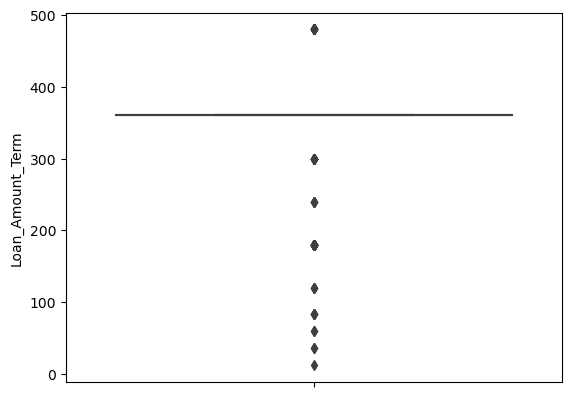

In [101]:
sns.boxplot(y = 'Loan_Amount_Term', data = dataset)
#we will fill the missing values with the maximum value(in case of bank domain) & not with mean or median

In [102]:
dataset['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [103]:
dataset['Loan_Amount_Term'] = dataset['Loan_Amount_Term'].fillna(360)
#as we have outliers present, we can fill the null values with median

In [104]:
dataset['Credit_History'].value_counts()
#credit history tells whether they have given the loan on time or not 

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

<Axes: ylabel='Credit_History'>

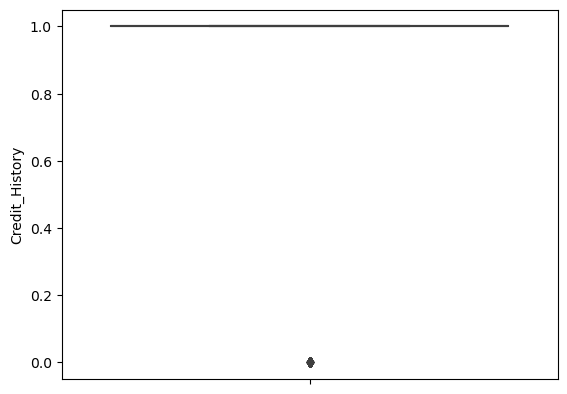

In [105]:
sns.boxplot(y = 'Credit_History', data = dataset)

In [106]:
dataset['Credit_History'] = dataset['Credit_History'].fillna(1.0)

In [107]:
#Null values have been filled : 
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [108]:
#Removing LoanID column as it is of no use
dataset = dataset.iloc[:,1:]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


**Label Encoding-Method - 1 {comes in preprocessing}**

In [109]:
#Changing char columns to numeric type
#Method-1(long & confusing)

In [110]:
#dataset['Gender']=dataset['Gender'].astype('category')
#dataset['Gender']=dataset['Gender'].cat.codes
#dataset = pd.get_dummies(dataset, columns = ['Gender'])

In [111]:
#dataset['Married']=dataset['Married'].astype('category')
#dataset['Married']=dataset['Married'].cat.codes
#dataset = pd.get_dummies(dataset, columns = ['Married'])

In [112]:
#dataset['Dependents']=dataset['Dependents'].astype('category')
#dataset['Dependents']=dataset['Dependents'].cat.codes
#dataset = pd.get_dummies(dataset, columns = ['Dependents'])

In [113]:
#dataset['Education']=dataset['Education'].astype('category')
#dataset['Education']=dataset['Education'].cat.codes
#dataset = pd.get_dummies(dataset, columns = ['Education'])

In [114]:
#dataset['Self_Employed']=dataset['Self_Employed'].astype('category')
#dataset['Self_Employed']=dataset['Self_Employed'].cat.codes
#dataset = pd.get_dummies(dataset, columns = ['Self_Employed'])

In [115]:
#dataset['Property_Area']=dataset['Property_Area'].astype('category')
#dataset['Property_Area']=dataset['Property_Area'].cat.codes
#dataset = pd.get_dummies(dataset, columns = ['Property_Area'])

In [116]:
#dataset['Loan_Status']=dataset['Loan_Status'].astype('category')
#dataset['Loan_Status']=dataset['Loan_Status'].cat.codes
#dataset = pd.get_dummies(dataset, columns = ['Loan_Status'])

In [117]:
#dataset.info()

In [118]:
#dataset.head()

In [119]:
#dataset = dataset.drop(['Gender_0','Married_0','Dependents_0','Education_0','Education_0',
                        #'Self_Employed_0','Property_Area_0','Loan_Status_0'], axis = 1)

**Label Encoding-Method-2 (simple)**

In [120]:
dataset_df = dataset

In [121]:
from sklearn import preprocessing

In [122]:
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
 #LabelEncoder is encoding the columns into numerical values  
    res_df['Gender']=le.fit_transform(res_df['Gender'])
    res_df['Married']=le.fit_transform(res_df['Married'])
    res_df['Education']=le.fit_transform(res_df['Education'])
    res_df['Dependents']=le.fit_transform(res_df['Dependents'])
    res_df['Self_Employed']=le.fit_transform(res_df['Self_Employed'])
    res_df['Property_Area']=le.fit_transform(res_df['Property_Area'])
    res_df['Loan_Status']=le.fit_transform(res_df['Loan_Status'])
    return res_df
encoded_dataset = preprocessor(dataset_df)

In [123]:
encoded_dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [124]:
x = encoded_dataset.drop(['Loan_Status'], axis = 1) # axis =1 means column, axis = 0 means row
y = encoded_dataset['Loan_Status']

In [125]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2


In [126]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [127]:
'''Checking for balance/imbalance dataset'''
encoded_dataset['Loan_Status'].value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [128]:
#Imbalance dataset as 192*2 = 394, != 422
#This will be handled by oversampling method / SMOTE Technique
#majority = 422
#minority = 192
#majority >= 2*minority (imbalance data)
#422 >= 2*192 (394), (imbalance data)

**Model Buidling**

In [129]:
#here we are not balancing data as it is important to keep the data imbalance in case of banking, ecommerce

In [130]:
'''Support Vector Machine'''
#Kernel means approach:
#Kernel : linear
#kernel : sigmoid
#kernel : polynomial
#kernel : rbf

'Support Vecot Machine'

In [131]:
from sklearn.svm import SVC #SVC -Support Vector Classifier, SVR-Support Vector Regression
classifier_svm_linear = SVC(kernel = 'linear')
classifier_svm_linear.fit(x,y)

SVC(kernel='linear')

In [132]:
classifier_svm_sigmoid = SVC(kernel = 'sigmoid')
classifier_svm_sigmoid.fit(x,y)

SVC(kernel='sigmoid')

In [133]:
classifier_svm_poly = SVC(kernel = 'poly')
classifier_svm_poly.fit(x,y)

SVC(kernel='poly')

In [134]:
classifier_svm_rbf = SVC(kernel = 'rbf')
classifier_svm_rbf.fit(x,y)

SVC()

**Predict Model : import Validation Test Dataset**

In [135]:
test_data = pd.read_csv('Credit_Risk_Validate_data_XTEST.csv')
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,outcome
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,N


In [136]:
#Need to again to null value check, filling null value again for the test validation data

In [137]:
test_data.isnull().sum()/len(test_data)* 100

Loan_ID              0.000000
Gender               2.997275
Married              0.000000
Dependents           2.724796
Education            0.000000
Self_Employed        6.267030
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           1.362398
Loan_Amount_Term     1.634877
Credit_History       7.901907
Property_Area        0.000000
outcome              0.000000
dtype: float64

In [140]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
 12  outcome            367 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 37.4+ KB


In [141]:
test_data = test_data.iloc[:,1:]
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             356 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         357 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      344 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         362 non-null    float64
 8   Loan_Amount_Term   361 non-null    float64
 9   Credit_History     338 non-null    float64
 10  Property_Area      367 non-null    object 
 11  outcome            367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [142]:
test_data['Gender'].value_counts()

Gender
Male      286
Female     70
Name: count, dtype: int64

In [143]:
test_data['Gender'] = test_data['Gender'].fillna('Male')
#categorical data null values are filled with mode

In [144]:
test_data['Dependents'].value_counts()

Dependents
0     200
2      59
1      58
3+     40
Name: count, dtype: int64

In [145]:
test_data['Dependents'] = test_data['Dependents'].fillna('0')

In [146]:
test_data['Self_Employed'].value_counts()

Self_Employed
No     307
Yes     37
Name: count, dtype: int64

In [147]:
test_data['Self_Employed'] = test_data['Self_Employed'].fillna('No')

<Axes: ylabel='LoanAmount'>

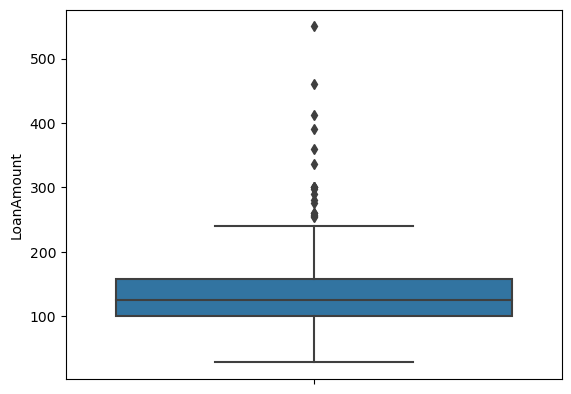

In [149]:
sns.boxplot(y = 'LoanAmount', data = test_data)

In [150]:
test_data['LoanAmount']=test_data['LoanAmount'].fillna(test_data['LoanAmount'].median())

<Axes: ylabel='Loan_Amount_Term'>

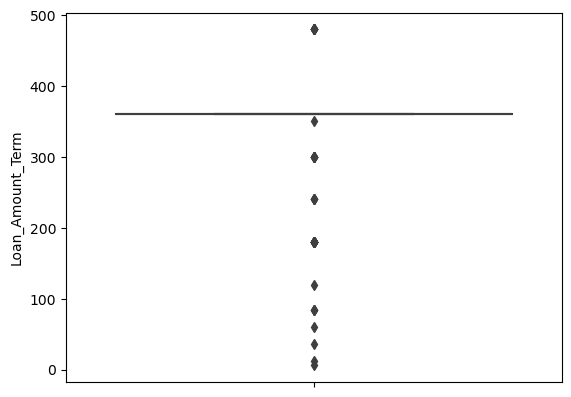

In [151]:
sns.boxplot(y = 'Loan_Amount_Term', data = test_data)

In [152]:
test_data['Loan_Amount_Term']=test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].median())

<Axes: ylabel='Credit_History'>

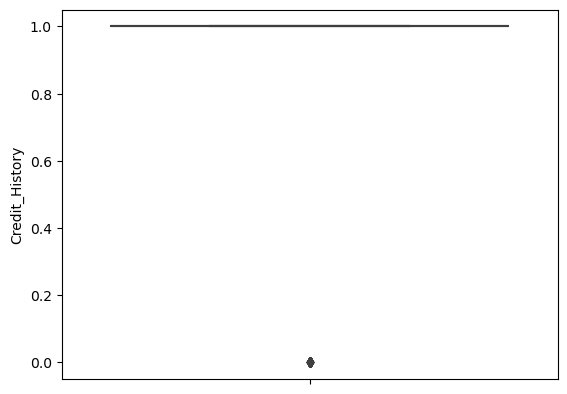

In [153]:
sns.boxplot(y = 'Credit_History', data = test_data)

In [154]:
test_data['Credit_History']=test_data['Credit_History'].fillna(test_data['Credit_History'].median())

In [156]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         367 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      367 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         367 non-null    float64
 8   Loan_Amount_Term   367 non-null    float64
 9   Credit_History     367 non-null    float64
 10  Property_Area      367 non-null    object 
 11  outcome            367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


**Label Encoding to the Test valdiate data**

In [157]:
test_data_df = test_data

In [158]:
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
 #LabelEncoder is encoding the columns into numerical values  
    res_df['Gender']=le.fit_transform(res_df['Gender'])
    res_df['Married']=le.fit_transform(res_df['Married'])
    res_df['Education']=le.fit_transform(res_df['Education'])
    res_df['Dependents']=le.fit_transform(res_df['Dependents'])
    res_df['Self_Employed']=le.fit_transform(res_df['Self_Employed'])
    res_df['Property_Area']=le.fit_transform(res_df['Property_Area'])
    res_df['outcome']=le.fit_transform(res_df['outcome'])
    return res_df
encoded_test_data = preprocessor(test_data_df)

In [159]:
encoded_test_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,outcome
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2,1
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2,1
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2,1
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2,1
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2,0


In [160]:
x_test = encoded_test_data.drop(['outcome'], axis = 1)
y_test = encoded_test_data['outcome']

In [161]:
x_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,4009,1777,113.0,360.0,1.0,2
363,1,1,0,0,0,4158,709,115.0,360.0,1.0,2
364,1,0,0,0,0,3250,1993,126.0,360.0,1.0,1
365,1,1,0,0,0,5000,2393,158.0,360.0,1.0,0


In [162]:
y_test

0      1
1      1
2      1
3      1
4      0
      ..
362    1
363    1
364    1
365    0
366    1
Name: outcome, Length: 367, dtype: int32

**Evaluation MATRIX**

In [163]:
y_pred_linear = classifier_svm_linear.predict(x_test)

In [164]:
y_pred_sigmoid = classifier_svm_sigmoid.predict(x_test)

In [165]:
y_pred_poly = classifier_svm_poly.predict(x_test)

In [166]:
y_pred_rbf = classifier_svm_rbf.predict(x_test)

In [167]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [168]:
print(classification_report(y_test,y_pred_linear))

              precision    recall  f1-score   support

           0       0.98      0.73      0.84        77
           1       0.93      1.00      0.96       290

    accuracy                           0.94       367
   macro avg       0.96      0.86      0.90       367
weighted avg       0.94      0.94      0.94       367



In [169]:
print(classification_report(y_test,y_pred_sigmoid))

              precision    recall  f1-score   support

           0       0.24      0.26      0.25        77
           1       0.80      0.78      0.79       290

    accuracy                           0.67       367
   macro avg       0.52      0.52      0.52       367
weighted avg       0.68      0.67      0.68       367



In [170]:
print(classification_report(y_test,y_pred_poly))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        77
           1       0.79      1.00      0.88       290

    accuracy                           0.79       367
   macro avg       0.39      0.50      0.44       367
weighted avg       0.62      0.79      0.70       367



In [171]:
print(classification_report(y_test,y_pred_rbf))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        77
           1       0.79      1.00      0.88       290

    accuracy                           0.79       367
   macro avg       0.40      0.50      0.44       367
weighted avg       0.62      0.79      0.70       367



G:\DATA SCIENCE -NOTES\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
G:\DATA SCIENCE -NOTES\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
G:\DATA SCIENCE -NOTES\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [172]:
print(confusion_matrix(y_test,y_pred_linear))

[[ 56  21]
 [  1 289]]


In [173]:
print(confusion_matrix(y_test,y_pred_sigmoid))

[[ 20  57]
 [ 63 227]]


In [174]:
print(confusion_matrix(y_test,y_pred_poly))

[[  0  77]
 [  1 289]]


In [175]:
print(confusion_matrix(y_test,y_pred_rbf))

[[  0  77]
 [  0 290]]


In [176]:
print(accuracy_score(y_test,y_pred_linear))
'''Best Accuracy Dataset'''

0.9400544959128065


In [177]:
print(accuracy_score(y_test,y_pred_sigmoid))

0.6730245231607629


In [178]:
print(accuracy_score(y_test,y_pred_poly))

0.7874659400544959


In [179]:
print(accuracy_score(y_test,y_pred_rbf))

0.7901907356948229


**Checking Train data accuracy**

In [182]:
y_pred_linear_train = classifier_svm_linear.predict(x)

In [183]:
print(accuracy_score(y,y_pred_linear_train))

0.8013029315960912


In [ ]:
#Training data accuracy is 80% & Test data accuracy is 94% , a variance of 15 can work , hence model
#is not overfitted or underfitted & also Kernel-Linear is efficient as it got the highest accuracy

**Importing Test Data where Target column needs to be predicted**

In [184]:
final_report  = pd.read_csv('Credit_Risk_Test_data.csv')
final_report.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [185]:
#Again finding missing values in the data
final_report.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [186]:
final_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [187]:
final_report['Gender'].value_counts()

Gender
Male      286
Female     70
Name: count, dtype: int64

In [189]:
final_report['Dependents'].value_counts()

Dependents
0     200
2      59
1      58
3+     40
Name: count, dtype: int64

In [191]:
final_report['Self_Employed'].value_counts()

Self_Employed
No     307
Yes     37
Name: count, dtype: int64

In [188]:
final_report['Gender']=final_report['Gender'].fillna('Male')

In [190]:
final_report['Dependents']=final_report['Dependents'].fillna('0')

In [192]:
final_report['Self_Employed']=final_report['Self_Employed'].fillna('No')

<Axes: ylabel='LoanAmount'>

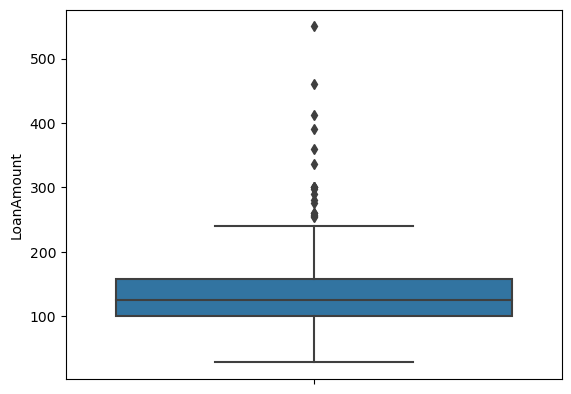

In [193]:
sns.boxplot(y = 'LoanAmount', data = final_report)

In [197]:
final_report['LoanAmount']=final_report['LoanAmount'].fillna(final_report['LoanAmount'].median())

<Axes: ylabel='Loan_Amount_Term'>

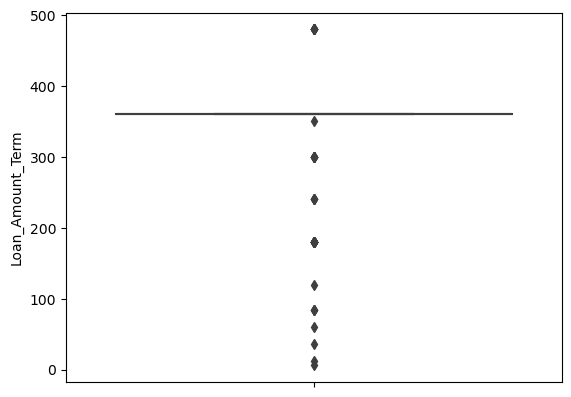

In [194]:
sns.boxplot(y = 'Loan_Amount_Term', data = final_report)

In [198]:
final_report['Loan_Amount_Term']=final_report['Loan_Amount_Term'].fillna(final_report['Loan_Amount_Term'].median())

<Axes: ylabel='Credit_History'>

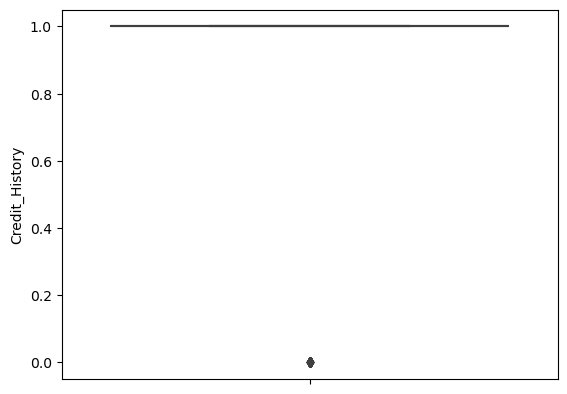

In [195]:
sns.boxplot(y = 'Credit_History', data = final_report)

In [199]:
final_report['Credit_History']=final_report['Credit_History'].fillna(final_report['Credit_History'].median())

In [200]:
final_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


**Label Encoding of Final report Dataset**

In [201]:
final_report_df = final_report

In [203]:
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
 #LabelEncoder is encoding the columns into numerical values  
    res_df['Gender']=le.fit_transform(res_df['Gender'])
    res_df['Married']=le.fit_transform(res_df['Married'])
    res_df['Education']=le.fit_transform(res_df['Education'])
    res_df['Dependents']=le.fit_transform(res_df['Dependents'])
    res_df['Self_Employed']=le.fit_transform(res_df['Self_Employed'])
    res_df['Property_Area']=le.fit_transform(res_df['Property_Area'])
    return res_df
encoded_final_report = preprocessor(final_report_df)

In [204]:
encoded_final_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    int32  
 2   Married            367 non-null    int32  
 3   Dependents         367 non-null    int32  
 4   Education          367 non-null    int32  
 5   Self_Employed      367 non-null    int32  
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    int32  
dtypes: float64(3), int32(6), int64(2), object(1)
memory usage: 25.9+ KB


In [205]:
#Dropped the Loan ID Column
encoded_final_report = encoded_final_report.iloc[:,1:]
encoded_final_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    int32  
 1   Married            367 non-null    int32  
 2   Dependents         367 non-null    int32  
 3   Education          367 non-null    int32  
 4   Self_Employed      367 non-null    int32  
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         367 non-null    float64
 8   Loan_Amount_Term   367 non-null    float64
 9   Credit_History     367 non-null    float64
 10  Property_Area      367 non-null    int32  
dtypes: float64(3), int32(6), int64(2)
memory usage: 23.1 KB


In [206]:
y_pred_final = classifier_svm_linear.predict(encoded_final_report)

In [207]:
encoded_final_report['y_pred_final'] = y_pred_final

In [208]:
encoded_final_report.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,y_pred_final
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2,1
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2,1
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2,1
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2,1
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2,1


In [209]:
print(accuracy_score(y_test,y_pred_final))

0.9400544959128065
